In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [1]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
from pandas.api.types import CategoricalDtype
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso,SGDRegressor, LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
import category_encoders as ce
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.pipeline import Pipeline, make_pipeline
import shap
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import cross_val_score, train_test_split, validation_curve, GridSearchCV, KFold, RandomizedSearchCV

### Область работы 2 (поиск лучшей модели)

In [2]:
path_train = 'dim_train.csv'
diamonds_df = pd.read_csv(path_train)
diamonds_df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.40,Premium,D,SI1,59.9,60.0,990,4.77,4.75,2.85
1,0.72,Very Good,D,VS2,61.8,58.0,3075,5.73,5.76,3.55
2,1.10,Very Good,J,SI2,61.9,55.0,4217,6.59,6.63,4.09
3,1.00,Very Good,F,VS1,62.1,60.0,6883,6.33,6.42,3.96
4,0.31,Good,G,VS2,63.6,56.0,544,4.26,4.29,2.72


In [3]:
diamonds_df.keys()

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [4]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [5]:
diamonds_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.798511,61.750641,57.464210,3932.458213,5.732606,5.736357,3.539659
std,0.473818,1.436004,2.241685,3985.283789,1.121428,1.151303,0.709549
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,955.000000,4.720000,4.730000,2.910000
50%,0.700000,61.800000,57.000000,2409.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5318.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18818.000000,10.740000,58.900000,31.800000


In [7]:
print("all cut:\n", diamonds_df.cut.value_counts())
print("all color:\n", diamonds_df.color.value_counts())
print("all clarity:\n", diamonds_df.clarity.value_counts())

all cut:
 Ideal        16081
Premium      10375
Very Good     9059
Good          3740
Fair          1200
Name: cut, dtype: int64
all color:
 G    8423
E    7354
F    7186
H    6177
D    5116
I    4063
J    2136
Name: color, dtype: int64
all clarity:
 SI1     9799
VS2     9261
SI2     6906
VS1     6119
VVS2    3771
VVS1    2708
IF      1341
I1       550
Name: clarity, dtype: int64


In [8]:
diamonds_df.describe(include = "O")

,cut,color,clarity
count,40455,40455,40455
unique,5,7,8
top,Ideal,G,SI1
freq,16081,8423,9799


In [6]:
print("before: ", diamonds_df.shape)
mask = diamonds_df.index[diamonds_df.eq(0.000000).any(axis=1)]
diamonds_df = diamonds_df.drop(diamonds_df.index[diamonds_df.eq(0).any(axis=1)])
print("after:", diamonds_df.shape)

before:  (40455, 10)
after: (40437, 10)


array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

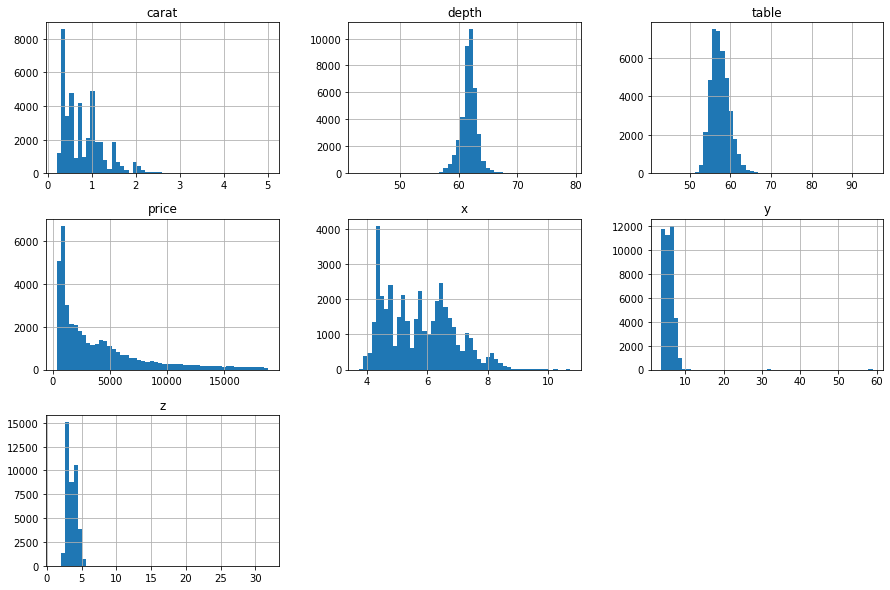

In [10]:
diamonds_df.hist(bins = 50 , figsize = (15,10))

<AxesSubplot:xlabel='price', ylabel='Count'>

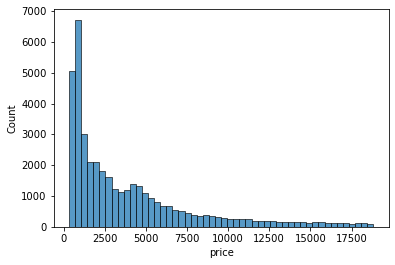

In [11]:
sns.histplot(x = "price" , data = diamonds_df, bins = 50)

<AxesSubplot:xlabel='price', ylabel='Count'>

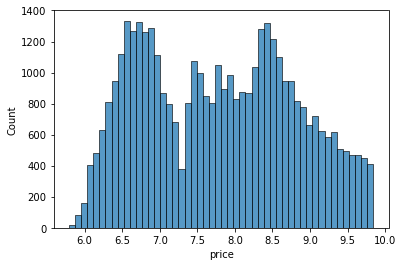

In [12]:
diamonds_df['price'] =np.log1p(diamonds_df['price'])
sns.histplot(x = "price" , data = diamonds_df, bins = 50)

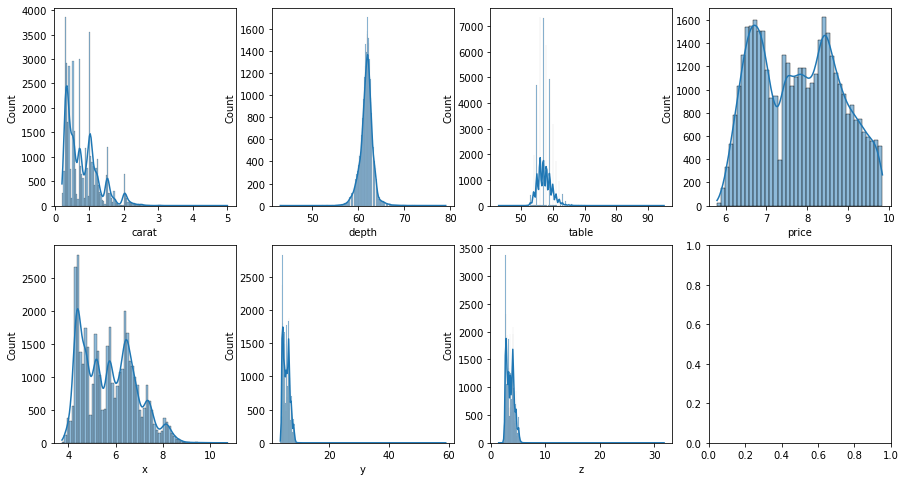

In [13]:
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
sns.histplot(data=diamonds_df, x="carat", kde=True, ax=axs[0, 0])
sns.histplot(data=diamonds_df, x="depth", kde=True,ax=axs[0, 1])
sns.histplot(data=diamonds_df, x="table", kde=True,  ax=axs[0, 2])
sns.histplot(data=diamonds_df, x="price", kde=True,  ax=axs[0, 3])
sns.histplot(data=diamonds_df, x="x", kde=True, ax=axs[1, 0])
sns.histplot(data=diamonds_df, x="y", kde=True, ax=axs[1, 1])
sns.histplot(data=diamonds_df, x="z", kde=True, ax=axs[1, 2])
plt.xlabel('')


plt.show()

In [ ]:
pd_plt.scatter_matrix(diamonds_df,
                     alpha = 0.6,
                     s=15,
                     figsize=(20,20),
                     diagonal='kde')
plt.show()

In [ ]:
sns.heatmap(diamonds_df.corr(), annot=True)
plt.show()

In [7]:
axis_features = ['x','y','z']
num_features = ['carat','depth','table']
y = np.array(diamonds_df.price)
X = diamonds_df.drop(columns=['price'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)

In [9]:
axis_transformer = Pipeline(steps=[
    ('polynom', PolynomialFeatures(2,include_bias=False)),
    ('scaler', StandardScaler())])

clarity_map = [{
    'col':'clarity',##### Обратить внимание
    'mapping':{'FL':10, 'IF':9, 'VVS1':8, 'VVS2':7, 'VS1':6, 'VS2':5, 
               'SI1':4, 'SI2':3, 'I1':2, 'I2':1, 'I3':0}
    }]
color_map = [{
    'col':'color',
    'mapping':{'D':6,'E':5,'F':4,'G':3,'H':2,'I':1,'J':0}
    }]
cut_map = [{
    'col':'cut',
    'mapping':{'Ideal':4,'Premium':3,"Very good":2,'Good':1,'Fair':0}
    }]
clarity_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=clarity_map)),
    ('scaler', MinMaxScaler())
    ])
color_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=color_map)),
    ('scaler', MinMaxScaler())
    ])
cut_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=cut_map)),
    ('scaler', MinMaxScaler())
    ])
    

CT = ColumnTransformer([
        ("pol_std", axis_transformer, axis_features),
        ("num", MinMaxScaler(), num_features),
        ("ordinal_map1", clarity_transformer, ['clarity']),
        ("ordinal_map2", color_transformer, ['color']),
        ("ordinal_map3", cut_transformer, ['cut'])
        ])

display(CT)

CT.fit(X_train)
X_train_transformed = CT.transform(X_train)
X_test_transformed = CT.transform(X_test)
newDf = pd.DataFrame(X_test_transformed).head()


ColumnTransformer(transformers=[('pol_std',
                                 Pipeline(steps=[('polynom',
                                                  PolynomialFeatures(include_bias=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['x', 'y', 'z']),
                                ('num', MinMaxScaler(),
                                 ['carat', 'depth', 'table']),
                                ('ordinal_map1',
                                 Pipeline(steps=[('ce',
                                                  OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                           'mapping': {'FL': 10,
                                                                                       'I1': 2,
                                                                                       'I2': 1,
                                                                                       'I3': 0,
                                                                                       'IF': 9,
                                                                                       'SI1': 4,
                                                                                       'SI2': 3,
                                                                                       'VS1...
                                ('ordinal_map2',
                                 Pipeline(steps=[('ce',
                                                  OrdinalEncoder(mapping=[{'col': 'color',
                                                                           'mapping': {'D': 6,
                                                                                       'E': 5,
                                                                                       'F': 4,
                                                                                       'G': 3,
                                                                                       'H': 2,
                                                                                       'I': 1,
                                                                                       'J': 0}}])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['color']),
                                ('ordinal_map3',
                                 Pipeline(steps=[('ce',
                                                  OrdinalEncoder(mapping=[{'col': 'cut',
                                                                           'mapping': {'Fair': 0,
                                                                                       'Good': 1,
                                                                                       'Ideal': 4,
                                                                                       'Premium': 3,
                                                                                       'Very good': 2}}])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['cut'])])

In [12]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train_transformed, y_train)

sc_train = knn.score(X_train_transformed , y_train)
sc_test =  knn.score(X_test_transformed,  y_test)

print("тренировочный: {:.3f}".format(sc_train))
print("тестовый: {:.3f}".format(sc_test))


тренировочный: 0.977
тестовый: 0.969


In [13]:
forest = RandomForestRegressor(n_estimators= 5)
forest.fit(X_train, y_train)

ValueError: could not convert string to float: 'Very Good'

In [12]:
explainer = shap.explainers.Tree(forest, X_train)
shap_values = explainer.shap_values(X_train)

feature_names = diamonds_df.feature_names

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 16677.752434, while the model output was 17060.400000. If this difference is acceptable you can set check_additivity=False to disable this check.

In [21]:
y_pred_train=knn.predict(X_train_transformed)
y_pred=knn.predict(X_test_transformed)
# Проверим тренировочный набор (не всегда нужно делать)
print('тренировочный R^2: {:.3f}'.format( r2_score(y_train,y_pred_train) ) )
# MSE само по себе мало значит, но важно при сравнении дрс другими результатами 
print('тренировочный MSE: {:.3f}'.format( mean_squared_error(y_train,y_pred_train) ) ) 

# Проверим тренировочный набор (не всегда нужно делать)
print('тестовый R^2: {:.3f}'.format( r2_score(y_test,y_pred) ) )
# MSE само по себе мало значит, но важно при сравнении дрс другими результатами 
print('тестовый MSE: {:.3f}'.format( mean_squared_error(y_test,y_pred) ) ) 

тренировочный R^2: 0.990
тренировочный MSE: 0.010
тестовый R^2: 0.987
тестовый MSE: 0.013


[1.    0.992 0.99  0.989 0.989 0.988 0.988 0.987 0.987 0.986]
[0.981 0.987 0.987 0.987 0.986 0.986 0.986 0.986 0.985 0.985]
[0.019 0.014 0.013 0.014 0.014 0.014 0.015 0.015 0.015 0.015]


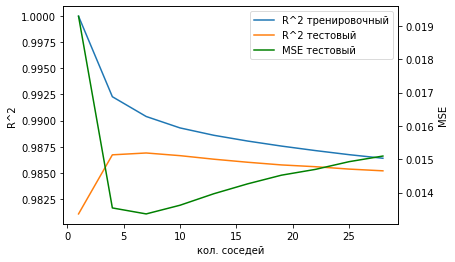

In [22]:
sc_train=[]
sc_test=[]
sc_train_mse=[]
sc_test_mse=[]

ran=range(1,30, 3)

for r in ran:
    knn = KNeighborsRegressor(n_neighbors=r)
    knn.fit(X_train_transformed, y_train)
    sc_train=np.append(sc_train,knn.score(X_train_transformed ,y_train))
    sc_test=np.append(sc_test, knn.score(X_test_transformed ,y_test)) 
    y_pred=knn.predict(X_test_transformed)
    sc_test_mse=np.append(sc_test_mse,  mean_squared_error (y_test, y_pred)   )
    
np.set_printoptions(precision=3)
print(sc_train)
print(sc_test)
print(sc_test_mse)

fig, ax1 = plt.subplots()
ax1.plot(ran,sc_train, label= 'R^2 тренировочный')
ax1.plot(ran,sc_test, label= 'R^2 тестовый')
ax1.set_xlabel('кол. соседей')
ax1.set_ylabel('R^2')
ax2 = ax1.twinx()
ax2.plot(ran,sc_test_mse,'-g', label= 'MSE тестовый')
ax2.set_ylabel('MSE') #  СКО - среднеквадрат ошибка  или MSE - mean squared error

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes, framealpha=0.7)
plt.show()

In [52]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('regressor',    KNeighborsRegressor())])
cv = KFold()
p = np.array([1,2,3])
n_neighbors = [2,4,6,8,10] #16 не входил
weights = ['uniform', 'distance']
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(),Normalizer()] #если б не было масштабирования надо было нан проипис
param_grid =[
    {'preprocessing': scaling, 
     'regressor': [KNeighborsRegressor()],
         'regressor__n_neighbors': n_neighbors, #двойное подчеркивание
         'regressor__p': p,
         'regressor__weights': weights
     }]
grid = RandomizedSearchCV(pipe, param_grid, cv=cv, return_train_score=True,n_jobs=-1)
grid.fit(X_train_transformed,y_train)
grid

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                             ('regressor',
                                              KNeighborsRegressor())]),
                   n_jobs=-1,
                   param_distributions=[{'preprocessing': [MinMaxScaler(),
                                                           StandardScaler(),
                                                           RobustScaler(),
                                                           Normalizer()],
                                         'regressor': [KNeighborsRegressor(n_neighbors=6,
                                                                           p=1,
                                                                           weights='distance')],
                                         'regressor__n_neighbors': [2, 4, 6, 8,
                                    

In [53]:
print("----------------- Обучили и тестировали -------------------")
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя правильность для наилучшей модели кроссвалидации на" 
      "валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test_transformed, y_test)))

----------------- Обучили и тестировали -------------------
Наилучшие параметры:
{'regressor__weights': 'distance', 'regressor__p': 1, 'regressor__n_neighbors': 6, 'regressor': KNeighborsRegressor(n_neighbors=6, p=1, weights='distance'), 'preprocessing': Normalizer()}

Средняя правильность для наилучшей модели кроссвалидации навалидационных тестовых наборах: 0.987022

Правильность для наилучшей модели на тестовом наборе: 0.988182



In [54]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,4,5,0,1,3,6,8,2,9,7
mean_fit_time,0.09493,0.101053,0.109137,0.13036,0.109912,0.134764,0.153305,0.073621,0.115507,0.165111
std_fit_time,0.014519,0.043102,0.014564,0.005935,0.013045,0.038048,0.023562,0.007531,0.026759,0.041713
mean_score_time,1.443229,1.637445,0.523827,2.298812,0.490688,1.388558,1.312832,2.568686,5.062718,7.590014
std_score_time,0.123971,0.392769,0.04687,0.636703,0.05722,0.219744,0.24755,0.488992,0.229417,1.180057
param_regressor__weights,distance,distance,distance,uniform,distance,distance,distance,uniform,uniform,uniform
param_regressor__p,1,1,2,1,1,1,1,3,3,3
param_regressor__n_neighbors,6,10,4,8,2,2,2,8,4,10
param_regressor,"KNeighborsRegressor(n_neighbors=6, p=1, weight...","KNeighborsRegressor(n_neighbors=6, p=1, weight...","KNeighborsRegressor(n_neighbors=6, p=1, weight...","KNeighborsRegressor(n_neighbors=6, p=1, weight...","KNeighborsRegressor(n_neighbors=6, p=1, weight...","KNeighborsRegressor(n_neighbors=6, p=1, weight...","KNeighborsRegressor(n_neighbors=6, p=1, weight...","KNeighborsRegressor(n_neighbors=6, p=1, weight...","KNeighborsRegressor(n_neighbors=6, p=1, weight...","KNeighborsRegressor(n_neighbors=6, p=1, weight..."
param_preprocessing,Normalizer(),Normalizer(),Normalizer(),RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler()
params,"{'regressor__weights': 'distance', 'regressor_...","{'regressor__weights': 'distance', 'regressor_...","{'regressor__weights': 'distance', 'regressor_...","{'regressor__weights': 'uniform', 'regressor__...","{'regressor__weights': 'distance', 'regressor_...","{'regressor__weights': 'distance', 'regressor_...","{'regressor__weights': 'distance', 'regressor_...","{'regressor__weights': 'uniform', 'regressor__...","{'regressor__weights': 'uniform', 'regressor__...","{'regressor__weights': 'uniform', 'regressor__..."


In [47]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X_train_transformed)
X_binned = kb.transform(X_train_transformed)
X_combined = np.hstack([X_train_transformed, X_binned])
X_binned_test = kb.transform(X_test_transformed)
X_combined_test = np.hstack([X_test_transformed,X_binned_test])

In [45]:
X_combined

array([[ 0.6  ,  0.703,  0.513, ...,  0.286,  0.333,  0.   ],
       [ 0.725,  0.685,  0.401, ...,  0.286,  0.   ,  0.8  ],
       [-1.587, -1.567, -1.494, ...,  0.571,  0.833,  0.   ],
       ...,
       [ 0.279,  0.32 ,  0.443, ...,  0.286,  0.5  ,  0.6  ],
       [-0.4  , -0.374, -0.455, ...,  0.429,  0.833,  0.   ],
       [-1.283, -1.265, -1.241, ...,  0.429,  0.833,  1.   ]])

In [12]:
model = ElasticNet()
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
grid = GridSearchCV(model, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_transformed, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.696e+10, tolerance: 3.560e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.692e+10, tolerance: 3.609e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solver

/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.685e+10, tolerance: 3.601e+07
  model = cd_fast.enet_coordinate_descent(
/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.658e+10, tolerance: 3.577e+07
  model = cd_fast.enet_coordinate_descent(
/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.600e+10, tolerance: 3.544e+07
  model = cd_fast.enet_coordinate_descent(
/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.630e+10, tolerance: 3.601e+07
  model = cd_fast.enet_coordinate_descent(
/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.000e+10, tolerance: 3.577e+07
  model = cd_fast.enet_coordinate_descent(
/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.033e+10, tolerance: 3.544e+07
  model = cd_fast.enet_coordinate_descent(
/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.851e+10, tolerance: 3.560e+07
  model = cd_fast.enet_coordinate_descent(
/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.855e+10, tolerance: 3.609e+07
  model = cd_fast.enet_coordinate_descent(
/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.281e+10, tolerance: 3.601e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.166e+10, tolerance: 3.577e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solver

/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.437e+10, tolerance: 3.609e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.197e+10, tolerance: 3.544e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solver

/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.680e+11, tolerance: 3.560e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.703e+11, tolerance: 3.609e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solver

Best Score:  0.826979491603616
Best Params:  {'alpha': 100, 'l1_ratio': 1}


In [32]:
model = Ridge()
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_transformed, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.9754078306623448
Best Params:  {'alpha': 100}


In [38]:
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
Grid_result = grid.fit(X_train_transformed, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.568e+00, tolerance: 2.321e+00
  model = cd_fast.enet_coordinate_descent(
/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.194e+00, tolerance: 2.330e+00
  model = cd_fast.enet_coordinate_descent(
/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

Best Score:  0.9754078306623448
Best Params:  {'alpha': 100}


/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.546e+00, tolerance: 2.907e+00
  model = cd_fast.enet_coordinate_descent(


In [38]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)
poly.fit(X_train_transformed)
X_train_poly = poly.transform(X_train_transformed)
X_test_poly = poly.transform(X_test_transformed)

In [48]:
first_reg = ElasticNet(alpha=0.001, l1_ratio=1)
second_reg = Ridge(alpha=0.001)
third_reg = Lasso(alpha=100)
regs = np.array([first_reg, second_reg, third_reg])
for r in regs:
    print("regression name:",r)
    r.fit(X_combined, y_train)
    y_pred=r.predict(X_combined_test)
    print('тестовый R^2: {:.3f}'.format( r2_score(y_test,y_pred) ) )
    print('тестовый MSE: {:.3f}'.format( mean_squared_error(y_test,y_pred) ) )
    print()

regression name: ElasticNet(alpha=0.001, l1_ratio=1)
тестовый R^2: 0.974
тестовый MSE: 0.000

regression name: Ridge(alpha=100)
тестовый R^2: 0.978
тестовый MSE: 0.000

regression name: Lasso(alpha=0.001)
тестовый R^2: 0.974
тестовый MSE: 0.000



In [75]:
clf = LinearSVR(C=0.01)
clf.fit(X_train_transformed, y_train)
y_pred=clf.predict(X_test_transformed)
print('тестовый R^2: {:.3f}'.format( r2_score(y_test,y_pred) ) )
print('тестовый MSE: {:.3f}'.format( mean_squared_error(y_test,y_pred) ) )

тестовый R^2: 0.912
тестовый MSE: 0.090


In [74]:
pipe = Pipeline([('preprocessing', StandardScaler()), 
                 ('regressor', LinearSVR())])

C=np.array([0.01,0.1,1,10,100,10**3,10**4, 10**5,10**6,10**7])


param_grid =[
    {'preprocessing': [StandardScaler()], 
     'regressor': [LinearSVR()],
     'regressor__C': C
     }
]

grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True)
grid.fit(X_train_transformed,y_train)
print("----------------- Обучили и тестировали -------------------")
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя правильность для наилучшей модели кроссвалидации на" 
      "валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test_transformed, y_test)))

/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn

----------------- Обучили и тестировали -------------------
Наилучшие параметры:
{'preprocessing': StandardScaler(), 'regressor': LinearSVR(C=0.01), 'regressor__C': 0.01}

Средняя правильность для наилучшей модели кроссвалидации навалидационных тестовых наборах: 0.971562

Правильность для наилучшей модели на тестовом наборе: 0.936806



/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [80]:
tree = DecisionTreeRegressor(max_depth=7, max_leaf_nodes=10,
                                       min_samples_leaf=3,
                                       min_weight_fraction_leaf=0.1)
tree.fit(X_train_transformed,y_train)
y_pred_train=tree.predict(X_train_transformed)
y_pred=tree.predict(X_test_transformed)
# Проверим тренировочный набор (не всегда нужно делать)
print('тренировочный R^2: {:.3f}'.format( r2_score(y_train,y_pred_train) ) )
# MSE само по себе мало значит, но важно при сравнении дрс другими результатами 
print('тренировочный MSE: {:.3f}'.format( mean_squared_error(y_train,y_pred_train) ) ) 

# Проверим тренировочный набор (не всегда нужно делать)
print('тестовый R^2: {:.3f}'.format( r2_score(y_test,y_pred) ) )
# MSE само по себе мало значит, но важно при сравнении дрс другими результатами 
print('тестовый MSE: {:.3f}'.format( mean_squared_error(y_test,y_pred) ) )
tree

тренировочный R^2: 0.929
тренировочный MSE: 0.001
тестовый R^2: 0.929
тестовый MSE: 0.001


DecisionTreeRegressor(max_depth=7, max_leaf_nodes=10, min_samples_leaf=3,
                      min_weight_fraction_leaf=0.1)

In [77]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('regressor',    DecisionTreeRegressor())])
cv = KFold()
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(),Normalizer()] #если б не было масштабирования надо было нан проипис
param_grid =[
    {'preprocessing': scaling, 
     'regressor': [DecisionTreeRegressor()],
         'regressor__splitter':["best","random"],
            'regressor__max_depth' : [1,3,5,7,9,11,12],
           'regressor__min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
           'regressor__min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           'regressor__max_features':["auto","log2","sqrt",None],
           'regressor__max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90]
     }]
grid = RandomizedSearchCV(pipe, param_grid, cv=cv, return_train_score=True,n_jobs=-1)
grid.fit(X_train_transformed,y_train)
grid

/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1315, in fit
   

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                             ('regressor',
                                              DecisionTreeRegressor())]),
                   n_jobs=-1,
                   param_distributions=[{'preprocessing': [MinMaxScaler(),
                                                           StandardScaler(),
                                                           RobustScaler(),
                                                           Normalizer()],
                                         'regressor': [DecisionTreeRegressor(max_depth=7,
                                                                             max_leaf_nodes=10,
                                                                             min_...
                                         'regressor__max_depth': [1, 3, 5, 7, 9,
                             

In [81]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,9,2,0,8,1,7,5,4,3,6
mean_fit_time,0.182271,0.045334,0.083525,0.032427,0.05116,0.01442,0.058507,0.062176,0.013961,0.015122
std_fit_time,0.046504,0.00421,0.002469,0.005211,0.002872,0.004255,0.003521,0.005161,0.001034,0.002379
mean_score_time,0.002721,0.003745,0.003656,0.003609,0.004096,0.00337,0.003694,0.003931,0.0,0.0
std_score_time,0.000605,0.000476,0.000319,0.000854,0.000899,0.000581,0.000291,0.000645,0.0,0.0
param_regressor__splitter,best,random,best,best,best,random,random,best,random,random
param_regressor__min_weight_fraction_leaf,0.1,0.1,0.3,0.4,0.3,0.4,0.1,0.5,0.8,0.8
param_regressor__min_samples_leaf,3,5,4,6,10,1,1,4,6,9
param_regressor__max_leaf_nodes,10,70,50,40,70,60,50,50,70,20
param_regressor__max_features,None,None,None,log2,auto,sqrt,log2,sqrt,auto,None
param_regressor__max_depth,7,9,11,9,7,9,3,3,3,5


In [83]:
random = RandomForestRegressor()
random.fit(X_train_transformed,y_train)
y_pred_train=tree.predict(X_train_transformed)
y_pred=tree.predict(X_test_transformed)
# Проверим тренировочный набор (не всегда нужно делать)
print('тренировочный R^2: {:.3f}'.format( r2_score(y_train,y_pred_train) ) )
# MSE само по себе мало значит, но важно при сравнении дрс другими результатами 
print('тренировочный MSE: {:.3f}'.format( mean_squared_error(y_train,y_pred_train) ) ) 

# Проверим тренировочный набор (не всегда нужно делать)
print('тестовый R^2: {:.3f}'.format( r2_score(y_test,y_pred) ) )
# MSE само по себе мало значит, но важно при сравнении дрс другими результатами 
print('тестовый MSE: {:.3f}'.format( mean_squared_error(y_test,y_pred) ) )

тренировочный R^2: 0.929
тренировочный MSE: 0.001
тестовый R^2: 0.929
тестовый MSE: 0.001


In [ ]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('regressor',    RandomForestRegressor())])
cv = KFold()
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(),Normalizer()]
mas = range(10,110,10)
param_grid = [{
    'preprocessing': scaling, 
    'regressor': [RandomForestRegressor()],
    'regressor__bootstrap': [True],
    'regressor__max_depth': mas,
    'regressor__max_features': [1, 2, 3, 4, 5],
    'regressor__min_samples_leaf': [3, 4, 5],
    'regressor__min_samples_split': [2, 4, 6, 8, 10, 12],
    'regressor__n_estimators': [100, 200, 300, 1000]
}]

grid = GridSearchCV(pipe, param_grid, cv=cv, return_train_score=True,n_jobs=-1, verbose = 2)
grid.fit(X_train_transformed,y_train)
grid




Fitting 5 folds for each of 14400 candidates, totalling 72000 fits
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=3, regressor__min_samples_split=2, regressor__n_estimators=100; total time=  14.3s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=3, regressor__min_samples_split=2, regressor__n_estimators=200; total time=  17.0s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=3, regressor__min_samples_split=2, regressor__n_estimators=300; total time=  15.5s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_

[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=200; total time=   7.6s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=300; total time=  10.9s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=300; total time=   6.7s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=4, regressor__min_samples_s

[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=3, regressor__min_samples_split=2, regressor__n_estimators=100; total time=  14.3s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=3, regressor__min_samples_split=2, regressor__n_estimators=200; total time=  16.9s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=3, regressor__min_samples_split=2, regressor__n_estimators=200; total time=  10.9s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=3, regressor__min_samples_s

[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=5, regressor__min_samples_split=2, regressor__n_estimators=200; total time=   4.4s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=5, regressor__min_samples_split=2, regressor__n_estimators=300; total time=  10.2s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=5, regressor__min_samples_split=2, regressor__n_estimators=300; total time=  12.4s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=5, regressor__min_samples_s

[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=4, regressor__min_samples_split=10, regressor__n_estimators=200; total time=   7.9s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=4, regressor__min_samples_split=10, regressor__n_estimators=300; total time=  10.9s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=4, regressor__min_samples_split=10, regressor__n_estimators=1000; total time=  40.8s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=4, regressor__min_sampl

[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=5, regressor__min_samples_split=4, regressor__n_estimators=100; total time=   2.6s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=5, regressor__min_samples_split=4, regressor__n_estimators=200; total time=   5.7s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=5, regressor__min_samples_split=4, regressor__n_estimators=200; total time=   5.7s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=5, regressor__min_samples_s

[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=2, regressor__min_samples_leaf=3, regressor__min_samples_split=6, regressor__n_estimators=200; total time=   6.1s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=2, regressor__min_samples_leaf=3, regressor__min_samples_split=6, regressor__n_estimators=300; total time=   9.0s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=2, regressor__min_samples_leaf=3, regressor__min_samples_split=6, regressor__n_estimators=1000; total time=  29.8s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=2, regressor__min_samples_leaf=3, regressor__min_samples_

[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=4, regressor__min_samples_split=8, regressor__n_estimators=300; total time=   6.3s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=4, regressor__min_samples_split=8, regressor__n_estimators=1000; total time=  26.0s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=4, regressor__min_samples_split=8, regressor__n_estimators=1000; total time=  31.6s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=4, regressor__min_samples

[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=2, regressor__min_samples_leaf=3, regressor__min_samples_split=10, regressor__n_estimators=300; total time=   8.8s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=2, regressor__min_samples_leaf=3, regressor__min_samples_split=10, regressor__n_estimators=1000; total time=  30.2s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=2, regressor__min_samples_leaf=3, regressor__min_samples_split=12, regressor__n_estimators=100; total time=   3.1s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=2, regressor__min_samples_leaf=3, regressor__min_sampl

[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=2, regressor__min_samples_leaf=3, regressor__min_samples_split=6, regressor__n_estimators=200; total time=   6.1s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=2, regressor__min_samples_leaf=3, regressor__min_samples_split=6, regressor__n_estimators=300; total time=   9.2s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=2, regressor__min_samples_leaf=3, regressor__min_samples_split=6, regressor__n_estimators=300; total time=   9.2s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=2, regressor__min_samples_leaf=3, regressor__min_samples_s

[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=2, regressor__min_samples_leaf=4, regressor__min_samples_split=6, regressor__n_estimators=200; total time=   6.1s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=2, regressor__min_samples_leaf=4, regressor__min_samples_split=6, regressor__n_estimators=300; total time=  10.1s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=2, regressor__min_samples_leaf=4, regressor__min_samples_split=6, regressor__n_estimators=1000; total time=  31.8s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=2, regressor__min_samples_leaf=4, regressor__min_samples_

[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=2, regressor__min_samples_leaf=5, regressor__min_samples_split=4, regressor__n_estimators=100; total time=   3.1s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=2, regressor__min_samples_leaf=5, regressor__min_samples_split=4, regressor__n_estimators=200; total time=   5.9s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=2, regressor__min_samples_leaf=5, regressor__min_samples_split=4, regressor__n_estimators=200; total time=   6.0s
[CV] END preprocessing=MinMaxScaler(), regressor=RandomForestRegressor(), regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=2, regressor__min_samples_leaf=5, regressor__min_samples_s

In [88]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,9,2,0,8,1,7,5,4,3,6
mean_fit_time,0.182271,0.045334,0.083525,0.032427,0.05116,0.01442,0.058507,0.062176,0.013961,0.015122
std_fit_time,0.046504,0.00421,0.002469,0.005211,0.002872,0.004255,0.003521,0.005161,0.001034,0.002379
mean_score_time,0.002721,0.003745,0.003656,0.003609,0.004096,0.00337,0.003694,0.003931,0.0,0.0
std_score_time,0.000605,0.000476,0.000319,0.000854,0.000899,0.000581,0.000291,0.000645,0.0,0.0
param_regressor__splitter,best,random,best,best,best,random,random,best,random,random
param_regressor__min_weight_fraction_leaf,0.1,0.1,0.3,0.4,0.3,0.4,0.1,0.5,0.8,0.8
param_regressor__min_samples_leaf,3,5,4,6,10,1,1,4,6,9
param_regressor__max_leaf_nodes,10,70,50,40,70,60,50,50,70,20
param_regressor__max_features,None,None,None,log2,auto,sqrt,log2,sqrt,auto,None
param_regressor__max_depth,7,9,11,9,7,9,3,3,3,5


### Область работы 3 (выполнение лучшей модели)

In [4]:
### Область работы 3 (выполнение лучшей модели)# Данный блок(и) в области 3 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [51]:
path_train = 'dim_train.csv'
path_test  = 'dim_test.csv'
diamonds_train = pd.read_csv(path_train)
X_test = pd.read_csv(path_test)
diamonds_train['price'] =np.log1p(diamonds_train['price'])

In [52]:
# Блок(и) обучения и поверки модели

In [53]:
diamonds_train = diamonds_train.drop(diamonds_train.index[diamonds_train.eq(0).any(axis=1)])
X_test = X_test.drop(X_test.index[X_test.eq(0).any(axis=1)])
rows = X_test.index

In [54]:
axis_features = ['x','y','z']
num_features = ['carat','depth','table']
y_train = np.array(diamonds_train.price)
X_train = diamonds_train.drop(columns=['price'])

In [55]:
axis_transformer = Pipeline(steps=[
    ('polynom', PolynomialFeatures(2,include_bias=False)),
    ('scaler', StandardScaler())])

clarity_map = [{
    'col':'clarity',##### Обратить внимание
    'mapping':{'FL':10, 'IF':9, 'VVS1':8, 'VVS2':7, 'VS1':6, 'VS2':5, 
               'SI1':4, 'SI2':3, 'I1':2, 'I2':1, 'I3':0}
    }]
color_map = [{
    'col':'color',
    'mapping':{'D':6,'E':5,'F':4,'G':3,'H':2,'I':1,'J':0}
    }]
cut_map = [{
    'col':'cut',
    'mapping':{'Ideal':4,'Premium':3,"Very good":2,'Good':1,'Fair':0}
    }]
clarity_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=clarity_map)),
    ('scaler', MinMaxScaler())
    ])
color_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=color_map)),
    ('scaler', MinMaxScaler())
    ])
cut_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=cut_map)),
    ('scaler', MinMaxScaler())
    ])
    

CT = ColumnTransformer([
        ("pol_std", axis_transformer, axis_features),
        ("num", MinMaxScaler(), num_features),
        ("ordinal_map1", clarity_transformer, ['clarity']),
        ("ordinal_map2", color_transformer, ['color']),
        ("ordinal_map3", cut_transformer, ['cut'])
        ])

display(CT)

CT.fit(X_train)
X_train_transformed = CT.transform(X_train)
X_test_transformed = CT.transform(X_test)
pd.DataFrame(X_test_transformed).head()



ColumnTransformer(transformers=[('pol_std',
                                 Pipeline(steps=[('polynom',
                                                  PolynomialFeatures(include_bias=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['x', 'y', 'z']),
                                ('num', MinMaxScaler(),
                                 ['carat', 'depth', 'table']),
                                ('ordinal_map1',
                                 Pipeline(steps=[('ce',
                                                  OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                           'mapping': {'FL': 10,
                                                                                       'I1': 2,
                                                                                       'I2': 1,
                                                                  

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.029641,-0.084213,-0.030088,-0.121780,-0.146749,-0.121366,-0.109161,-0.143395,-0.090925,0.103950,0.527778,0.288462,0.142857,0.666667,0.8
1,-0.405072,-0.441034,-0.469333,-0.466183,-0.481878,-0.497702,-0.310098,-0.500772,-0.383651,0.070686,0.502778,0.326923,0.571429,0.500000,0.8
2,-1.263199,-1.206892,-1.276977,-1.154451,-1.134040,-1.167451,-0.690196,-1.119351,-0.851510,0.020790,0.497222,0.346154,0.428571,0.333333,0.0
3,-0.306745,-0.258272,-0.355979,-0.378529,-0.355680,-0.402953,-0.209073,-0.371407,-0.310690,0.083160,0.494444,0.326923,0.428571,0.333333,0.0
4,-1.146994,-1.085051,-1.220300,-1.069306,-1.046185,-1.104487,-0.634397,-1.055304,-0.821652,0.027027,0.472222,0.384615,0.714286,0.500000,0.0


In [56]:
knn = KNeighborsRegressor(n_neighbors=7, p = 1, weights='uniform')
knn.fit(X_train_transformed, y_train)

KNeighborsRegressor(n_neighbors=7, p=1)

In [57]:
# Блок предсказания с использованием тестового набора

In [58]:
y_temp = knn.predict(X_test_transformed)

In [59]:
# Маска отобраных номеров строк для предсказания из тестового набора
mask = rows
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = np.expm1(y_temp)